<h1><center>Chapter03. 데이터 마트</center></h1>

<h1><center>제 2절. 데이터 가공</center></h1>

## 1. Data Exploration

데이터 분석을 위해서 **head(), summary()** 명령어로 데이터의 상태를 파악해야 한다.

1. 수치형 변수 : 최대값, 최소값, 평균 등
2. 명목형 면주 : 명목값, 데이터 개수

In [2]:
# Diamond Data
# head()를 통해 상위 5개의 데이터를 출력
require(ggplot2)
data(diamonds)
dia.data <- diamonds
head(dia.data)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [3]:
# 데이터 분포 파악
# 수치 변수별 최소값, 1사분위수, 중앙값, 평균, 3사반위수, 최대값
# 명목 변수별 데이터 값의 개수 카운드
summary(dia.data)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## 2. 변수 중요도

변수 선택법과 유사한 개념으로 **klaR 패키지**를 사용한다. 변수에 따라 어떻게 분류되는지 에러율과 결과를 그래프로 출력한다.
- `Wilk's Lambda` : 집단내분산 / 총분산, 종속변수에 미치는 영향력에 따라 변수의 중요도를 정리
- `greedy.wilks()` : Wilk's Lambda 값을 기준으로 단계적으로 전진 변수/모델 선택을 수행
- `plineplot()` : Wilk's Lambda값을 반환하며 작을 수록 설명력이 좋음 
- `Categorial Variable` : 이산형, 범주형 변수로 명목변수와 순위변수로 나뉨

### Wilks.lambda
각각의 기능이 각각의 데이터를 얼마나 잘 분류하는지 보여주는 척도이다. 그룹간의 차이로 설명되지 않는 차별적 점수의 총 분산 비율과 동일합니다. 값이 작을 수록 차별성이 더 커짐을 의미한다.

![img](http://www.statisticshowto.com/wp-content/uploads/2015/03/wilks-lambda-300x68.png)
- form : https://goo.gl/KeMsoL

In [45]:
# greedy.wiks 예제
library("klaR")
# greedy.wilks(formula, data = NULL, ...)
iris.result <- greedy.wilks(Species~., data=iris, niveau=0.1)

In [44]:
# 결과값을 보니 Petal.Width, Sepal.Length가 제일 유용
iris.result$results

vars,Wilks.lambda,F.statistics.overall,p.value.overall,F.statistics.diff,p.value.diff
Petal.Length,0.05862828,1180.1612,2.856777e-91,1180.161182,2.856777e-91
Sepal.Width,0.03688411,307.1047,2.848870e-103,43.035453,1.998401e-15
Petal.Width,0.02497554,257.5032,5.036981e-113,34.568686,5.122569e-13
Sepal.Length,0.02343863,199.1453,1.365006e-112,4.721152,1.031871e-02


In [50]:
# 결과값을 변수로 담아 Wilks.lambda 만 출력.
iris.step$results$Wilks.lambda

[1] 0.05862828 0.03688411 0.02497554 0.02343863

In [70]:
# iris2 데이터셋 생성
iris2 <- iris[, c(1,3,5)]  # Sepal.Length, Petal.Length, Species
head(iris2)

Sepal.Length,Petal.Length,Species
5.1,1.4,setosa
4.9,1.4,setosa
4.7,1.3,setosa
4.6,1.5,setosa
5.0,1.4,setosa
5.4,1.7,setosa


[1] 0.03333333

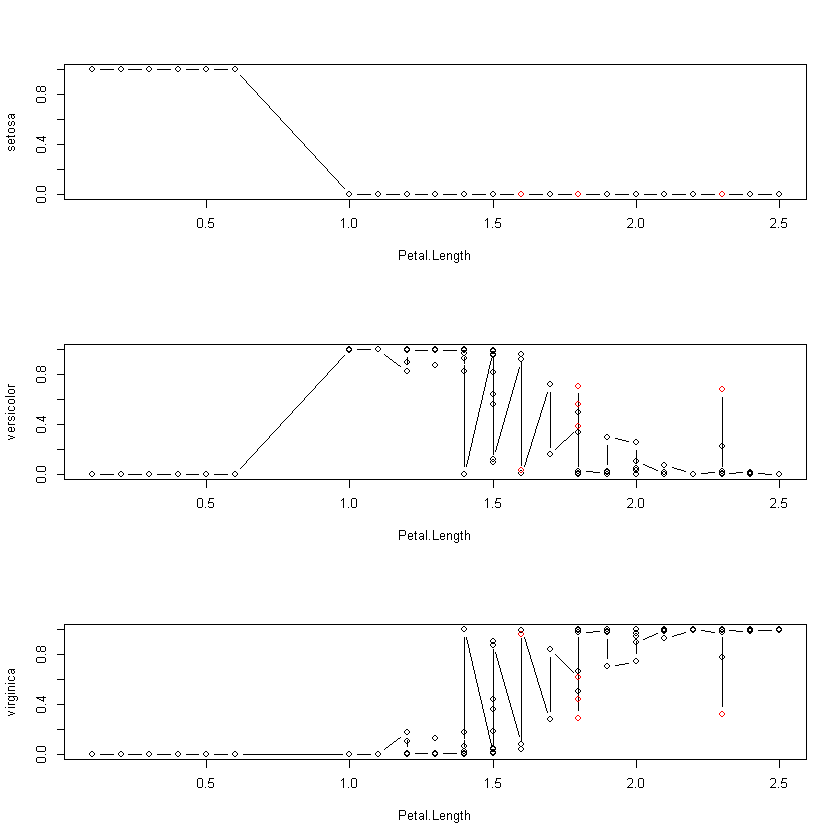

In [95]:
# Petal.Length로 plineplot 그래프 출력
# plineplot(formula, data, method, x, col.wrong = "red", ylim = c(0, 1), loo = FALSE, mfrow, ...)
# lda는 잠재 다래클래 할당
plineplot(Species ~. , data=iris2, method="lda", x=iris[,4], xlab="Petal.Length")

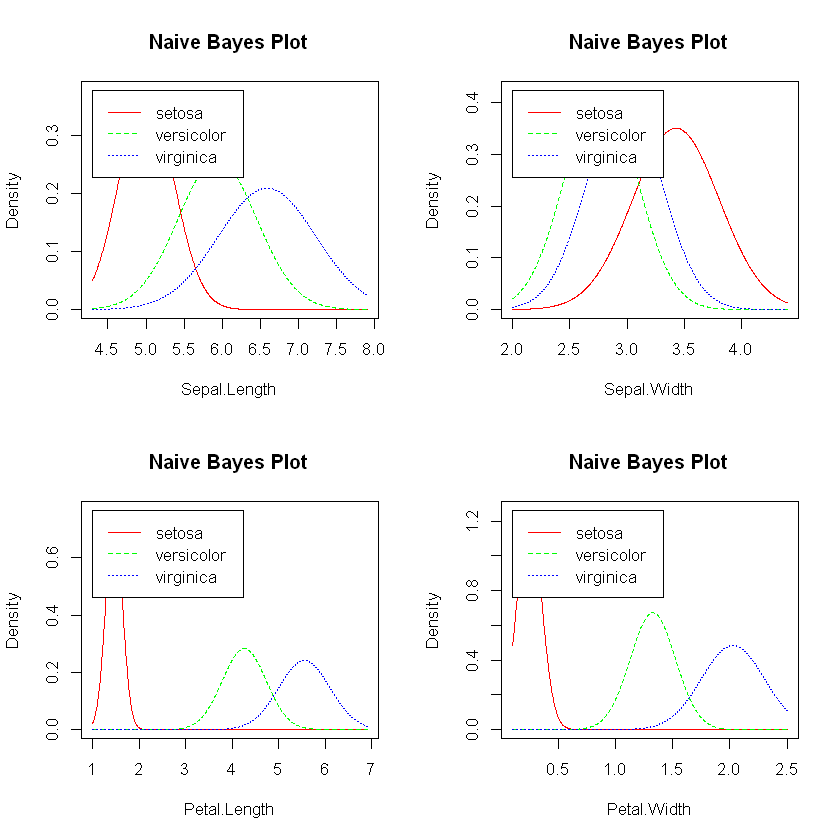

In [122]:
# Petal Length에 따라 Species가 잘 구분된다. 
# 변수를 그룹핑해서 Cetegorial Variable(범주형 변수)로 활용 : 0~0.5, 0.5~1.5, ...
# 베이즈정리에 따라 각 독립변수별로 나눔
# Species 변수의 범주에 따라 조건부 사후 확률을 계싼
mN <- NaiveBayes(Species~., data=iris)
par(mfrow=c(2,2))
plot(mN)

## 3. 변수의 구간화

신용평가모델, 고객 세분화 등 시스템으로 모형을 적용하기 위해서는 각 변수의 구간화 작업이 필요하다.
1. **binning** : [Continuous 연속형] 변수를 [Categorial 범주형]으로 변환. 등간격으로 50개 이하로 나누어 각 구간을 병합하면서 줄여나가는 방식
1. **의사결정나무** : 세분화 또는 예ㄱ에 활용되는 의사결정나무 모형을 활용

-----

<h1><center>제 3절. 기초 분석 및 데이터 관리</center></h1>

## 1. 결측값 처리

결측값은 `NA, ., 999999..., Unkowon, Not Anser`등으로 표현되며 결측값을 적절히 처리하는 것이 중요하다.
- 결측 : 계획된 실험에서 어떤 이유로 인해 이루어지지 못한 관측
- **is.na()** : 결측값을 확인하는 명령어. 
- **colSums()** : 각 변수별 결측값을 확인.
- **na.rm = TRUE** : 결측값을 제거하는 옵션.
- **na.omit()** : 결측값이 있는 행 전체를 제거.
- **complete.cases()** : 결측값이 있는 특정 행,열을 제거.
- **$var** : 결측값을 다른 값으로 대체. `dataset$var[is.na(dataset$var)] <- New Data`
- **sapply()** : 일괄적으로 작업할 때 사용.

### 결측값 예제
http://rfriend.tistory.com/34

In [4]:
# 간단한 정보는 바로 결측값을 확인 가능
x <- c(1,2,3,4,NA,6,7,NA,8,9,NA)
is.na(x)

[1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE

In [10]:
# 결측값의 개수를 게산
library(MASS)
sum(is.na(Cars93))  # 전체 결측값
sum(is.na(Cars93$Manufacturer))  # 특정 변수 결측값
colSums(is.na(Cars93))  # 전체 변수별로 결측값

[1] 13

[1] 0

Manufacturer              Model               Type          Min.Price 
                 0                  0                  0                  0 
             Price          Max.Price           MPG.city        MPG.highway 
                 0                  0                  0                  0 
           AirBags         DriveTrain          Cylinders         EngineSize 
                 0                  0                  0                  0 
        Horsepower                RPM       Rev.per.mile    Man.trans.avail 
                 0                  0                  0                  0 
Fuel.tank.capacity         Passengers             Length          Wheelbase 
                 0                  0                  0                  0 
             Width        Turn.circle     Rear.seat.room       Luggage.room 
                 0                  0                  2                 11 
            Weight             Origin               Make 
                 0                  0                  0

In [17]:
# 결측값이 포함된 데이터로 계산시 NA 처리됨.
sum(Cars93$Luggage.room)   # NA
mean(Cars93$Luggage.room)   # NA

[1] NA

[1] NA

In [18]:
# SUM, MEAN 등의 계산을 위핸 결측값을 제거
sum(Cars93$Luggage.room, na.rm=T)
mean(Cars93$Luggage.room, na.rm=T)

[1] 1139

[1] 13.89024

In [22]:
# 결측값이 들어있는 행 전체를 제거 
Cars93.rmMissValue <- na.omit(Cars93)b
sum(is.na(Cars93.rmMissValue))

[1] 0

In [71]:
# 특정 행과 열과 행을 제거
# Rear.sear.room 칼럼 내 결측값이 있는 행 전체 선택
rear <- Cars93[, "Rear.seat.room"]   # 26.5 30 28 31 27 28 30.5 ...
rear.case <- complete.cases(rear)   # TRUE TRUE TRUE ...
Cars93.rear <- Cars93[case,]        # rear.case가 FALSE인 행만 제거

# 중간 점검
cat('결측값 수 / 전체 수 :', sum(F == rear.case), '/', length(Cars93[, "Rear.seat.room"]), '\n')

# 결과
cat('전체 결측값 수 : ', sum(is.na(Cars93.rear)))   # 12개 중 3개가 줄어 9개

결측값 수 / 전체 수 : 2 / 93 
전체 결측값 수 :  9

In [110]:
# 23~24번째 칼럼중 결측값이 있는 행 전체 삭제
't3t4' <- Cars93[23:24]   # 26.5, 11, 30.0, 15, 28.0, 14
t3t4.case <- complete.cases(t3t4)   # TRUE TRUE TRUE TRUE TRUE
Cars93.t3t4 <- Cars93[t3t4.case, ]  # 23~24열중 FALSE인 행만 제거

# 중간 점검
cat('총 행 개수 : ', nrow(t3t4), '\n')  # 총 93개의 행
cat('결측값 수 / 전체 수 :', sum(F == t3t4.case), '/', nrow(Cars93[23:24]), '\n')

# 결과
cat('dim :', dim(Cars93.t3t4) )  # 관측값이 82개로 11개 줄어듬

총 행 개수 :  93 
결측값 수 / 전체 수 : 11 / 93 
dim : 82 27

In [122]:
# 결측값을 다른 값으로 대체
# Luggage.room의 결측값을 다른 값으로 대체
cat('Luggage.room의 결측값 개수: ', sum(is.na(Cars93$Luggage.room)), '\n')   # 11

Cars93.new <- Cars93
Cars93.new$Luggage.room[is.na(Cars93.new$Luggage.room)] <- 0  # 결측값을 0으로 채움

cat('0으로 대체후 0의 개수', length(Cars93.new$Luggage.room[Cars93.new$Luggage.room==0]), '\n')

cat('0으로 대체된 위치: ', which(0==Cars93.new$Luggage.room))

Luggage.room의 결측값 개수:  11 
0으로 대체후 0의 개수 11 
0으로 대체된 위치:  16 17 19 26 36 56 57 66 70 87 89

In [127]:
# 0이 아닌 평균값으로 대체
# NA의 값이 해당 열의 평균값으로 대체
Care93.missMean <- Cars93
Care93.mlr <- Care93.missMean$Luggage.room
Care93.mlr[is.na(Care93.mlr)] <- mean(Care93.mlr, na.rm=T)
Care93.mlr

[1] 11.00000 15.00000 14.00000 17.00000 13.00000 16.00000 17.00000 21.00000
 [9] 14.00000 18.00000 14.00000 13.00000 14.00000 13.00000 16.00000 13.89024
[17] 13.89024 20.00000 13.89024 15.00000 14.00000 17.00000 11.00000 13.00000
[25] 14.00000 13.89024 16.00000 11.00000 11.00000 15.00000 12.00000 12.00000
[33] 13.00000 12.00000 18.00000 13.89024 18.00000 21.00000 10.00000 11.00000
[41]  8.00000 12.00000 14.00000 11.00000 12.00000  9.00000 14.00000 15.00000
[49] 14.00000  9.00000 19.00000 22.00000 16.00000 13.00000 14.00000 13.89024
[57] 13.89024 12.00000 15.00000  6.00000 15.00000 11.00000 14.00000 12.00000
[65] 14.00000 13.89024 14.00000 14.00000 16.00000 13.89024 17.00000  8.00000
[73] 17.00000 13.00000 13.00000 16.00000 18.00000 14.00000 12.00000 10.00000
[81] 15.00000 14.00000 10.00000 11.00000 13.00000 15.00000 13.89024 10.00000
[89] 13.89024 14.00000 15.00000 14.00000 15.00000

In [129]:
# 데이터 프레임의 모든 팽의 결측값을 0으로 일괄 대체
Cars93_allCol <- Cars93
Cars93_allCol[is.na(Cars93_allCol)] <- 0
sum(is.na(Cars93_allCol))  # 0

[1] 0

In [162]:
# 각 변수의 결측값을 변수별 평균값으로 일괄 대체
# sapply()함수로 일괄적으로 작업 가능
Cars93_sapply <- Cars93[1:20, c("Rear.seat.room", "Luggage.room")]  # 1부터 20행까지 rear와 luggage 칼럼
colSums(is.na(Cars93_sapply))  # 각 1, 3개의 결측치

tail(Cars93_sapply)  # 테이블로 보면 NA 확인 가능

sapply(Cars93_sapply, function(x) mean(x, na.rm=T))  # 각 행별 평균을 구하는 공식
       
Cars93_sapply_table <- data.frame(
                            sapply(
                                Cars93_sapply, 
                                function(x) 
                                    ifelse(is.na(x), mean(x, na.rm=T), x)
                                )
                            )
       
# 테이블로 표시하면 평균값으로 바뀐 걸 확인 가능
tail(Cars93_sapply_table)

Rear.seat.room   Luggage.room 
             1              3

,Rear.seat.room,Luggage.room
15,28.5,16
16,30.5,NA
17,33.5,NA
18,29.5,20
19,NA,NA
20,31.0,15


Rear.seat.room   Luggage.room 
      29.10526       15.35294

,Rear.seat.room,Luggage.room
15,28.50000,16.00000
16,30.50000,15.35294
17,33.50000,15.35294
18,29.50000,20.00000
19,29.10526,15.35294
20,31.00000,15.00000


### 1_1. 결측값이 의미 있는 경우
- 쇼핑몰 가입자 중 특정 거래가 존재하지 않는 경우.
- 인구통계학 데이터에서, 아주 부자거나 아주 가난한 경우를 구분할 때.

### 1_2. 결측값 처리의 영향
- 이상값은 반드시 제거할 데이터가 아니므로 분석 목적에 따라 적절히 처리.
- `na.rm=T` 옵션으로 결측값을 제거하여 계산 가능.

## 2. 결측값 처리 방법

### 2_1. [SI Single Imputation 단순대치법]
1. 결측값이 존재하는 레코드를 삭제
2. **[Mean Imputation 평균대치법]** : 평균 데이터로 대치. 비조건부와 조건부 평균 대치법으로 구분.
3. **[Single Stochastic Imputation 단순확률대치법]** : 평균대치법을 표준오차 문제를 보완.
    - Hot-deck, Nearest-neighbor 방법
    
### 2_2 [MI Mutiple Imputation 다중대치법]
단순대치법을 여러번 실행하여 m번의 대치로 m개의 자료를 만드는 방법이다.
- 1단계 [Imputation 대치], 2단계 [Aanalysis 분석], 3단계 [Comvination 결합]
- Amelia-time series cross sectional dataset : 세계 여러 나라에서 특정한 데이터를 활용한 다중 대치법

## 3.R에서 결측값 처리

### 3_1. [Random Forest 랜덤 포레스트] 
랜덤 포레스트 모델은 결측값이 존재할 경우 바로 에러 발생하므로 rflmpute()함수를 사용하여 NA를 제거하여 적용한다.

### 3_2 결측값 관련 함수
1. `complte.case()` : 레코드내에 결측값이 있으면 FALSE, 아니면 TRUE를 반환
1. `is.na()` : 데이터 내에 결측값이 있으면 TRUE, 아니면 TURE를 반환
1. `centralImputation()` : DMwR 패키지, NA값에 가운데 값으로 대치
1. `knnImputation()` : NA값을 k최근접 이웃 분류 알고리즘을 사용하여 대치
1. `amelia()` : time series cross sectional dataset에서 활용

## 4. 이상값 찾기와 처리

### 4_1. [Outlier 이상값]
의도하지 않게 잘못 입력하거나 분석 목적에 부합하지 않아 제거해야 하는 데이터.

### 4_2. 이상값 인식 방법
1. [ESD Extreme Studentized Deviation] : 평균으로 부터 표준편차 3이상 떨어진 값
    - 기하평균 - 2.5 x 표준편차 < data < 기하평균 + 2.5 x 표준편차 
1. 사분위수로 상자 밖의 값을 제거.
    - Q1 - 2.5(Q3-Q1) < data < Q3 - 2.5(Q3-Q1)
    
### 4_3 극단값 [Trimming 절단] 방법
1. `geo_mean` : 기하평균을 이용하여 제거
1. 하단, 상단 5%(전체 10%) 제거

### 4_4 극단값[Winsorizing  조정] 방법
1. 상한값과 하한값을 벗어나는 값을 하한, 상한 값으로 바꾸어 활용

----